In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

## OneHot encoder labels
* 0. airplane
* 1. automobile
* 2. bird
* 3. cat
* 4. deer
* 5. dog
* 6. frog
* 7. horse
* 8. ship
* 9. truck

In [3]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_dict = {0: 'airplane', 1: 'automobile', 2: 'bird',
          3: 'cat', 4: 'deer',5: 'dog', 6: 'frog',
          7: 'horse', 8: 'ship',9: 'truck'}

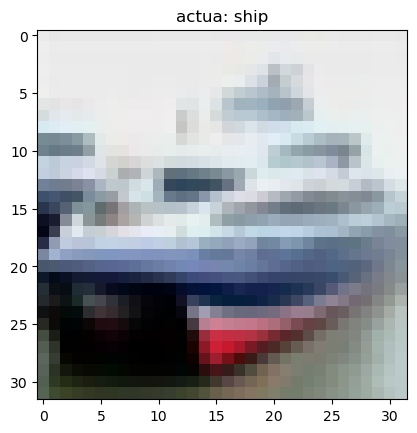

In [52]:
def visualize_image(image,label,predict = np.zeros(5)):
    plt.imshow(image)
    if np.all(predict == 0) :
        plt.title('actua: '+ y_dict.get(np.argmax(label))) 
    else:
        plt.title('actua: '+ y_dict.get(np.argmax(label)) + 
                  ' predict: '+ y_dict.get(np.argmax(predict)) + 
                  '\n probablity: %.3f' % (np.max(predict)*100))
visualize_image(x_test[1],y_test[1])

In [5]:
x_train = x_train/255.0
x_test = x_test/255.0

## Constuct CNNs model

In [6]:
model = Sequential()
# feature detection
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', padding = 'same', kernel_initializer='he_normal', input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# feature detection
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(10,kernel_size = (3,3),activation = 'relu', padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
# feature detection
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', padding = 'same', kernel_initializer='he_normal'))
model.add(BatchNormalization())
# pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
# Model
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
# build model
optimizer = Adam()
model.compile(loss = 'categorical_crossentropy',
             optimizer = optimizer,
             metrics = ['accuracy'])

In [8]:
model.fit(x_train,y_train,batch_size = 64, epochs = 50,validation_data=(x_test,y_test))

Epoch 1/50
782/782 [==============================] - 148s 189ms/step - loss: 1.2294 - accuracy: 0.5605 - val_loss: 1.0504 - val_accuracy: 0.6162
Epoch 2/50
782/782 [==============================] - 147s 188ms/step - loss: 1.0022 - accuracy: 0.6434 - val_loss: 0.9951 - val_accuracy: 0.6400
Epoch 3/50
782/782 [==============================] - 146s 186ms/step - loss: 0.8926 - accuracy: 0.6832 - val_loss: 0.7919 - val_accuracy: 0.7138
Epoch 4/50
782/782 [==============================] - 145s 186ms/step - loss: 0.8202 - accuracy: 0.7094 - val_loss: 0.7610 - val_accuracy: 0.7237
Epoch 5/50
782/782 [==============================] - 146s 187ms/step - loss: 0.7666 - accuracy: 0.7283 - val_loss: 0.7714 - val_accuracy: 0.7362
Epoch 6/50
782/782 [==============================] - 146s 186ms/step - loss: 0.7231 - accuracy: 0.7432 - val_loss: 0.7774 - val_accuracy: 0.7200
Epoch 7/50
782/782 [==============================] - 146s 186ms/step - loss: 0.6867 - accuracy: 0.7590 - val_loss: 0.7270 -

In [13]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 14ms/step


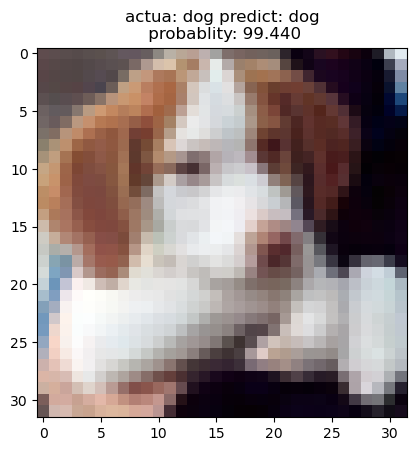

In [56]:
visualize_image(x_test[16],y_test[16],y_pred[16])